In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_excel('transactions_data.xlsx', parse_dates=['SALE_DATE'])
df.head()

,SALE_DATE,MODEL_YEAR,MAKE_NAME,MODEL_NAME,VEHICLE_NAME,SEGMENT,DATA_SOURCE,SALE_PRICE_AMOUNT,MSRP_AMOUNT,MILEAGE,...,DRIVETRAIN_DESCRIPTION,BEDLENGTH,BODY_STYLE,CAB_CONFIGURATION,DOOR_COUNT,TRUCK_FLG,TRANSACTION_GEOGRAPHY_ID,CITY_DISPLAY_NAME,STATE,SALE_TYPE
0,2016-12-31,2016,Kia,Soul,! Wagon 4D,Compact Car,VIN_SOLUTIONS,21903.86,22275,1,...,FWD,NaN,Wagon,NaN,4,NaN,37654,Montpelier,VT,Retail
1,2016-12-31,2017,Nissan,Murano,SL Sport Utility 4D,Midsize SUV Crossover,VIN_SOLUTIONS,38094.00,38930,10,...,AWD,NaN,SUV,NaN,4,NaN,35015,Corpus Christi,TX,Retail
2,2016-12-31,2016,Chevrolet,Cruze Limited,2LT Sedan 4D,Compact Car,VIN_SOLUTIONS,24413.00,27090,9,...,FWD,NaN,Sedan,NaN,4,NaN,36058,Georgetown,TX,Retail
3,2016-12-31,2017,Buick,LaCrosse,Premium Sedan 4D,Midsize Car,KEN_GARFF,43917.21,46972,44,...,FWD,NaN,Sedan,NaN,4,NaN,36567,Humble,TX,Retail
4,2016-12-31,2017,Honda,CR-V,EX Sport Utility 4D,Compact SUV Crossover,VIN_SOLUTIONS,28100.00,28895,12,...,AWD,NaN,SUV,NaN,4,NaN,19160,Rochester,MN,Retail


### Cleaning up the data

Rename the columns to lowercase and drop useless columns

In [5]:
df = (df.rename(columns=str.lower)
     .drop(['engine_subtype', 'bedlength', 'cab_configuration', 'truck_flg'], axis=1)
     .dropna(subset=['city_display_name']))

Let's check for null values

In [6]:
df.isnull().sum()

sale_date                       0
model_year                      0
make_name                       0
model_name                      0
vehicle_name                    0
segment                         0
data_source                     0
sale_price_amount               0
msrp_amount                     0
mileage                         0
days_in_inventory              75
transmission_description        0
transmission_num_of_speeds    581
transmission_type              30
engine_description              0
engine_cylinders               16
engine_displacement            16
engine_type                     0
drivetrain_description          0
body_style                      0
door_count                      0
transaction_geography_id        0
city_display_name               0
state                           0
sale_type                       0
dtype: int64

In [7]:
df.days_in_inventory = df.days_in_inventory.fillna(value=df.days_in_inventory.mean()).astype(int)

In [8]:
df.loc[df.transmission_type.isnull(), ['model_name', 'transmission_description']]

,model_name,transmission_description
116,Volt,Single-Speed Fixed Gear
180,Volt,Single-Speed Fixed Gear
244,Volt,Single-Speed Fixed Gear
265,7 Series,"Automatic, 8-Spd Sport w/Sport & Manual Modes"
308,Volt,Single-Speed Fixed Gear
393,7 Series,"Automatic, 8-Spd Sport w/Sport & Manual Modes"
436,Volt,Single-Speed Fixed Gear
746,7 Series,"Automatic, 8-Spd Sport w/Sport & Manual Modes"
807,X5,"Automatic, 8-Spd Steptronic w/Adaptive Control..."
823,X5,"Automatic, 8-Spd Steptronic w/Adaptive Control..."


Looks like the vehicles that are missing transmission types are hybrids, electric vehicles, and some BMWs (must be a data issue). We can just assume these are automatics.

In [9]:
df.transmission_type = df.transmission_type.fillna(value='Automatic')

In [10]:
df.loc[df.transmission_num_of_speeds.isnull(), ['transmission_description']]

,transmission_description
1,"Automatic, Xtronic CVT"
4,"Automatic, CVT"
7,"Automatic, CVT"
19,"Automatic, CVT"
23,"Automatic, CVT w/Manual Mode"
28,"Automatic, eCVT"
35,"Automatic, CVT"
36,"Automatic, CVT"
37,"Automatic, CVT w/Xtronic"
38,"Automatic, CVT"


A lot of vehicles are missing the number of speeds for the transmission because they are CVTs. We can just assume they have 1 speed. However, some have the number of speeds in the description which we can use to extract and fill the nulls.

In [11]:
cond = (df.transmission_num_of_speeds.isnull()) & (df.transmission_description.str.contains('\d'))
df.loc[cond, 'transmission_num_of_speeds'] = df.loc[cond, 'transmission_description'].str.extract('(\d)')

df.transmission_num_of_speeds = df.transmission_num_of_speeds.fillna(1)

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [12]:
df = df.loc[df.transmission_num_of_speeds != 'Unknown', :]
df.transmission_num_of_speeds.value_counts(dropna=False)

6.0     997
1       467
8.0     238
7.0      71
9        67
8        51
5.0      44
9.0      33
7         9
10.0      5
6         3
4.0       1
Name: transmission_num_of_speeds, dtype: int64

In [13]:
df.transmission_num_of_speeds = df.transmission_num_of_speeds.astype(int)

In [14]:
df.loc[(df.engine_cylinders.isnull()) | (df.engine_displacement.isnull()), 'model_name'].value_counts()

Volt       13
Bolt EV     2
LEAF        1
Name: model_name, dtype: int64

Vehicles that are missing either the engine cylinders or the displacement are hybrids and EVs. While hybrids do have gasoline engines with cylinders and displacement, we can just assume 0.

In [15]:
df.loc[df.engine_cylinders.isnull(), ['engine_cylinders']] = 0
df.loc[df.engine_displacement.isnull(), 'engine_displacement'] = 0

In [16]:
df.isnull().sum()

sale_date                     0
model_year                    0
make_name                     0
model_name                    0
vehicle_name                  0
segment                       0
data_source                   0
sale_price_amount             0
msrp_amount                   0
mileage                       0
days_in_inventory             0
transmission_description      0
transmission_num_of_speeds    0
transmission_type             0
engine_description            0
engine_cylinders              0
engine_displacement           0
engine_type                   0
drivetrain_description        0
body_style                    0
door_count                    0
transaction_geography_id      0
city_display_name             0
state                         0
sale_type                     0
dtype: int64

Since transmission type is binary (automatic or manual), we can just transform it to a numerical label using LabelEncoder.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['transmission_type_le'] = le.fit_transform(df.transmission_type.values)

In [18]:
df.engine_type.value_counts()

Gas              1706
Flexible Fuel     130
Hybrid             76
Diesel             71
Electric            3
Name: engine_type, dtype: int64

We can do the same for engine type, but since it has more than 2 labels we'll have to create dummy variables.

In [19]:
df = df.loc[df.engine_type != 'Unknown']
df.engine_type.value_counts()

Gas              1706
Flexible Fuel     130
Hybrid             76
Diesel             71
Electric            3
Name: engine_type, dtype: int64

In [20]:
eng_type = pd.get_dummies(df.engine_type)
df = pd.concat([df, eng_type], axis=1)
df.head()

,sale_date,model_year,make_name,model_name,vehicle_name,segment,data_source,sale_price_amount,msrp_amount,mileage,...,transaction_geography_id,city_display_name,state,sale_type,transmission_type_le,Diesel,Electric,Flexible Fuel,Gas,Hybrid
0,2016-12-31,2016,Kia,Soul,! Wagon 4D,Compact Car,VIN_SOLUTIONS,21903.86,22275,1,...,37654,Montpelier,VT,Retail,0,0,0,0,1,0
1,2016-12-31,2017,Nissan,Murano,SL Sport Utility 4D,Midsize SUV Crossover,VIN_SOLUTIONS,38094.00,38930,10,...,35015,Corpus Christi,TX,Retail,0,0,0,0,1,0
2,2016-12-31,2016,Chevrolet,Cruze Limited,2LT Sedan 4D,Compact Car,VIN_SOLUTIONS,24413.00,27090,9,...,36058,Georgetown,TX,Retail,0,0,0,0,1,0
3,2016-12-31,2017,Buick,LaCrosse,Premium Sedan 4D,Midsize Car,KEN_GARFF,43917.21,46972,44,...,36567,Humble,TX,Retail,0,0,0,0,1,0
4,2016-12-31,2017,Honda,CR-V,EX Sport Utility 4D,Compact SUV Crossover,VIN_SOLUTIONS,28100.00,28895,12,...,19160,Rochester,MN,Retail,0,0,0,0,1,0


## Exploratory Data Analysis

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


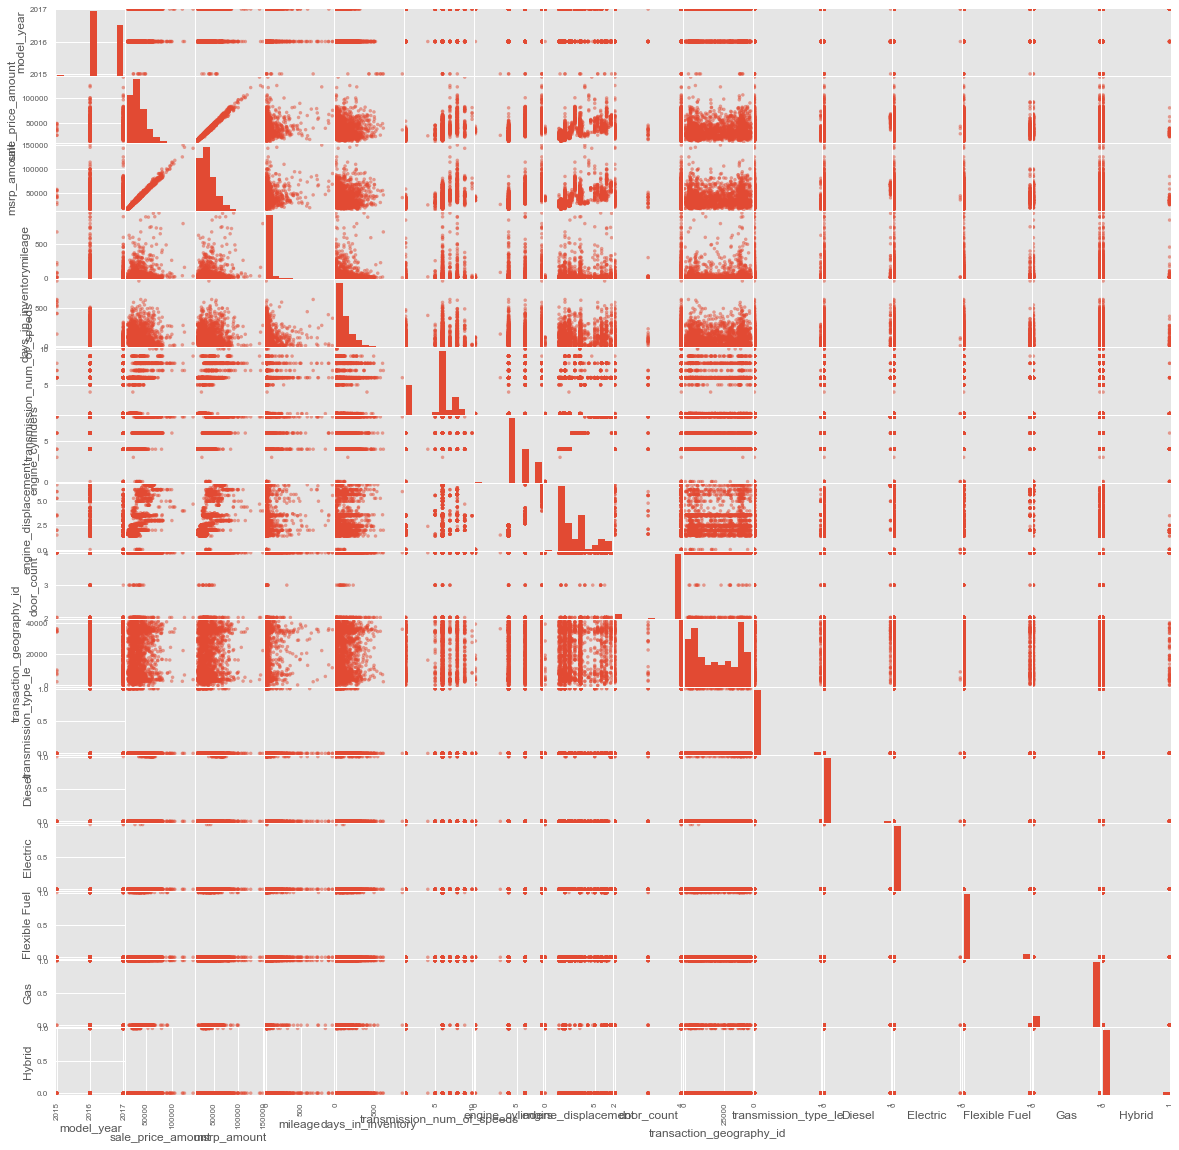

In [21]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20));

In [22]:
df.columns

Index(['sale_date', 'model_year', 'make_name', 'model_name', 'vehicle_name',
       'segment', 'data_source', 'sale_price_amount', 'msrp_amount', 'mileage',
       'days_in_inventory', 'transmission_description',
       'transmission_num_of_speeds', 'transmission_type', 'engine_description',
       'engine_cylinders', 'engine_displacement', 'engine_type',
       'drivetrain_description', 'body_style', 'door_count',
       'transaction_geography_id', 'city_display_name', 'state', 'sale_type',
       'transmission_type_le', 'Diesel', 'Electric', 'Flexible Fuel', 'Gas',
       'Hybrid'],
      dtype='object')

In [23]:
cols = ['Diesel','Electric','Flexible Fuel', 'Gas', 'Hybrid','transmission_type_le', 'door_count', 'engine_displacement', 'engine_cylinders', 'days_in_inventory', 'transmission_num_of_speeds','mileage', 'msrp_amount', 'model_year', 'sale_price_amount']

In [24]:
df.engine_displacement = df.engine_displacement.astype(float)

In [25]:
df.engine_cylinders = df.engine_cylinders.astype(int)

In [26]:
df[cols].dtypes

Diesel                          uint8
Electric                        uint8
Flexible Fuel                   uint8
Gas                             uint8
Hybrid                          uint8
transmission_type_le            int64
door_count                      int64
engine_displacement           float64
engine_cylinders                int32
days_in_inventory               int32
transmission_num_of_speeds      int32
mileage                         int64
msrp_amount                     int64
model_year                      int64
sale_price_amount             float64
dtype: object

In [27]:
df.sale_price_amount = df.sale_price_amount.astype(int)

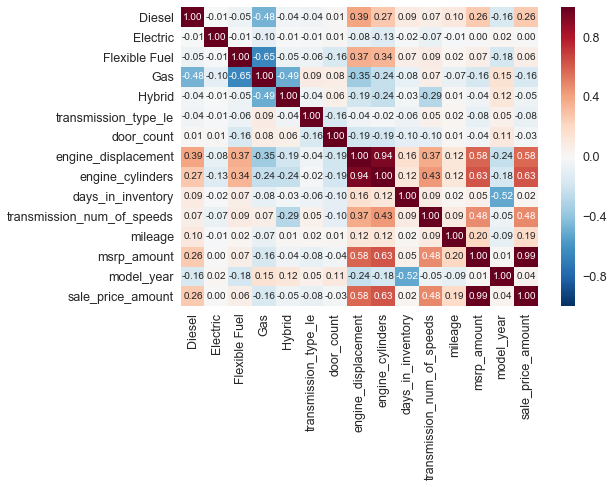

In [37]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=cols,
                xticklabels=cols)
fig = hm.get_figure()
fig.savefig("correlation_matrix.png", bbox_inches='tight')

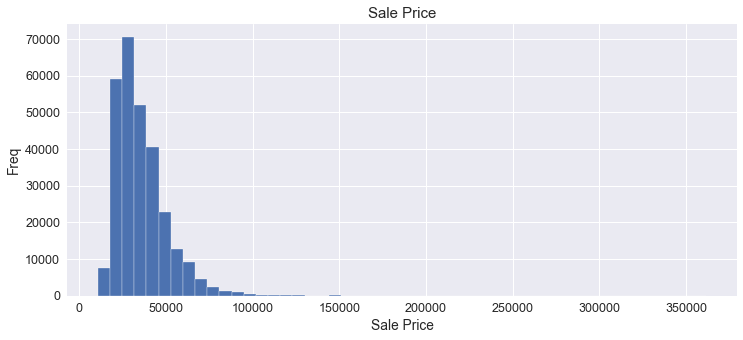

In [42]:
fig, ax = plt.subplots(figsize=(12,5))

ax.hist(df.sale_price_amount, 50, edgecolor='w')

plt.xlabel('Sale Price')
plt.ylabel('Freq')
plt.title('Sale Price');

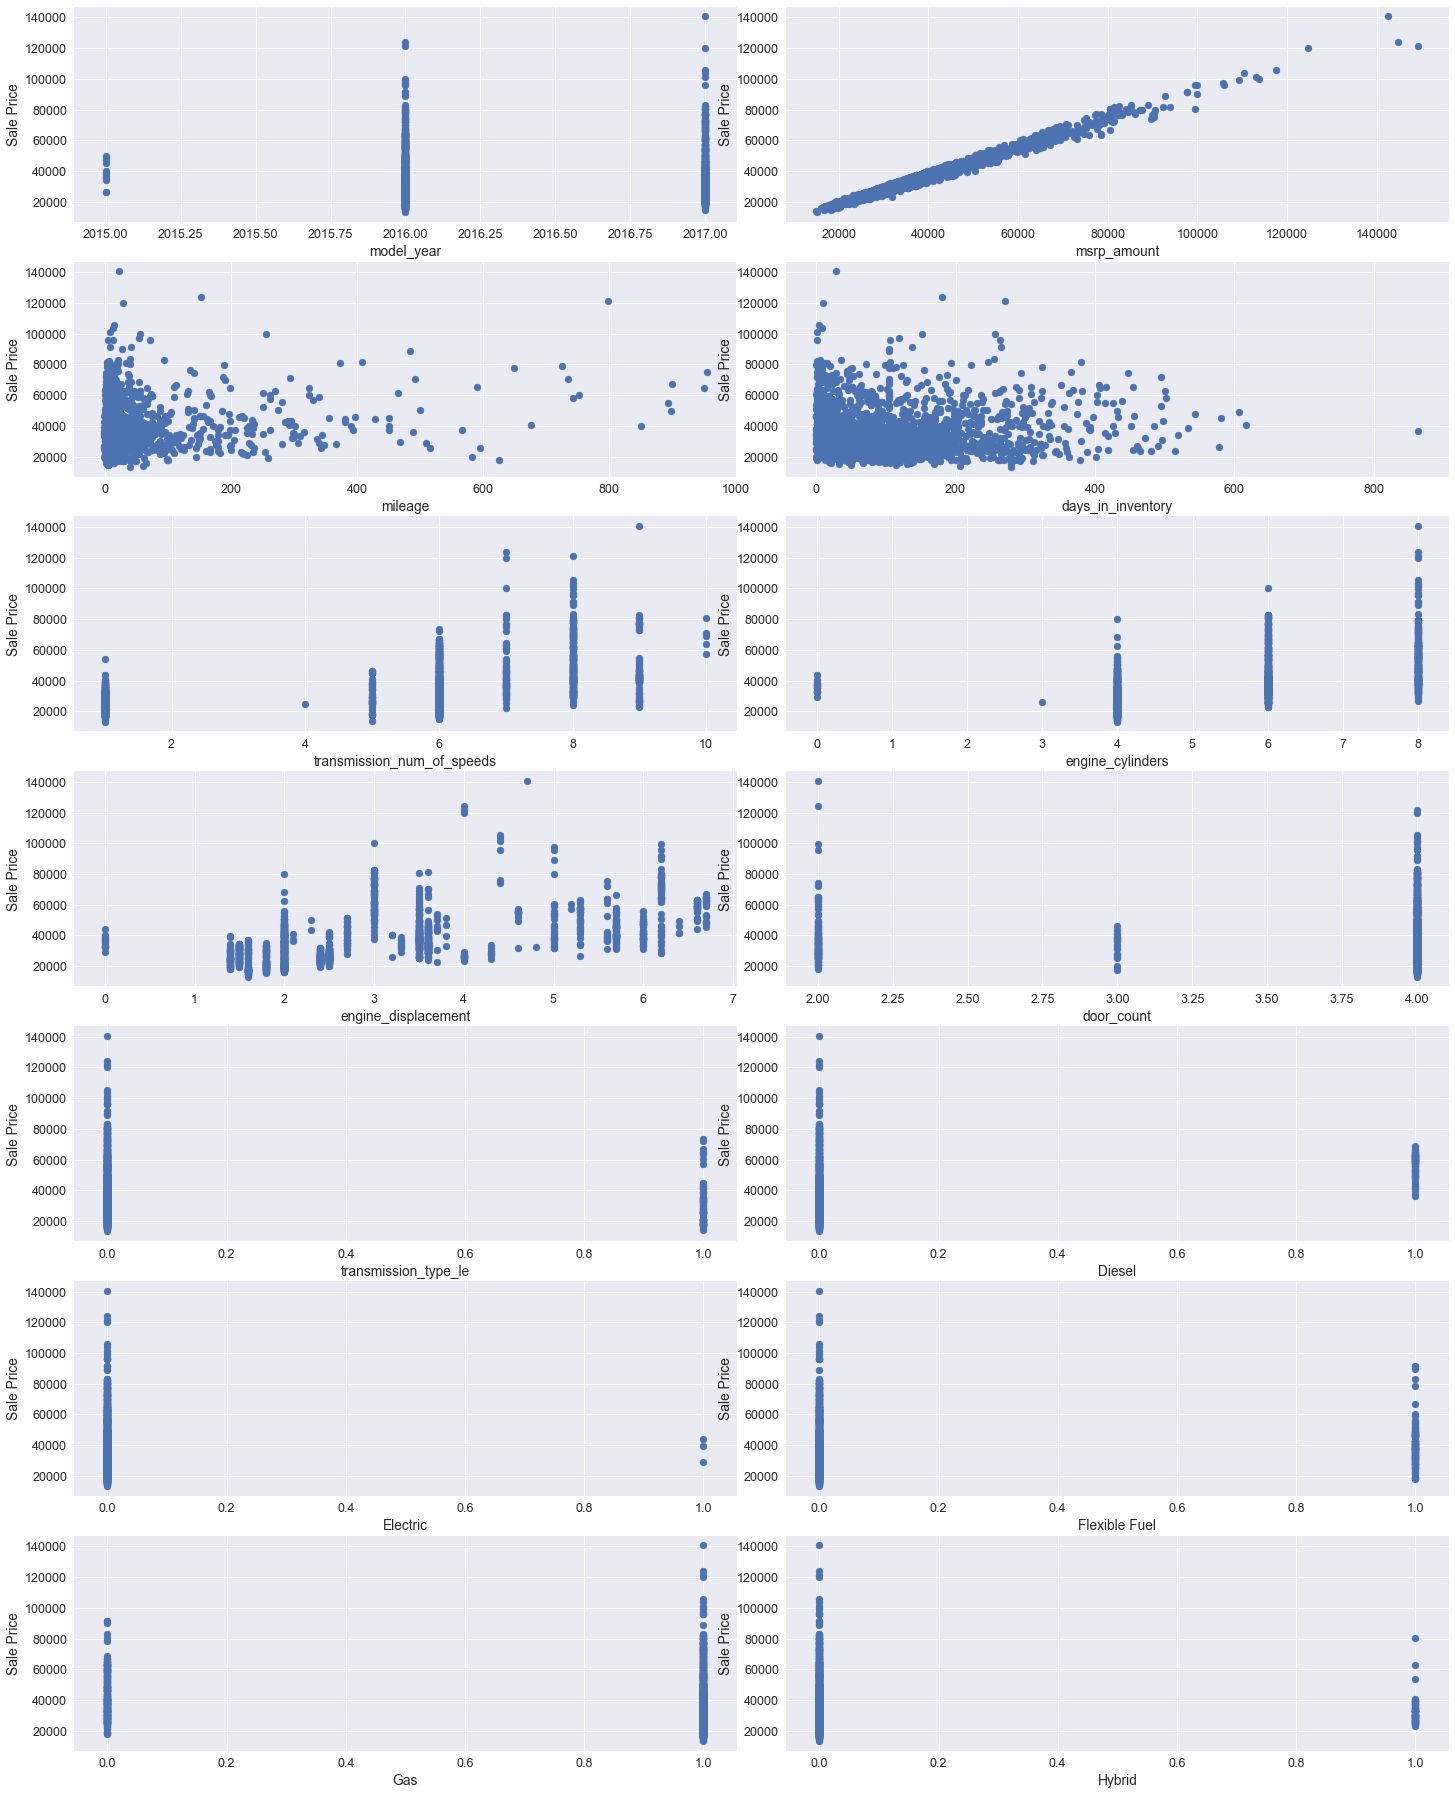

In [66]:
plot_columns = ['model_year', 'msrp_amount', 'mileage', 'days_in_inventory',
                'transmission_num_of_speeds', 'engine_cylinders', 'engine_displacement',
                'door_count', 'transmission_type_le', 'Diesel', 'Electric', 'Flexible Fuel',
               'Gas', 'Hybrid']

fig, ax = plt.subplots(7, 2, figsize=(20,25))
plt.tight_layout()
z = 0
for i in range(7):
    for j in range(2):
        _ = ax[i][j].scatter(df[plot_columns[z]], df.sale_price_amount)
        _1 = ax[i][j].set(xlabel=plot_columns[z], ylabel='Sale Price')
        z += 1

In [51]:
df = df.loc[df.segment != "Exotic", :]

In [52]:
name = df.make_name.unique()
name.sort()
name

array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac',
       'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford', 'GMC', 'Genesis',
       'Honda', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Kia',
       'Land Rover', 'Lexus', 'Lincoln', 'MINI', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Scion',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'], dtype=object)

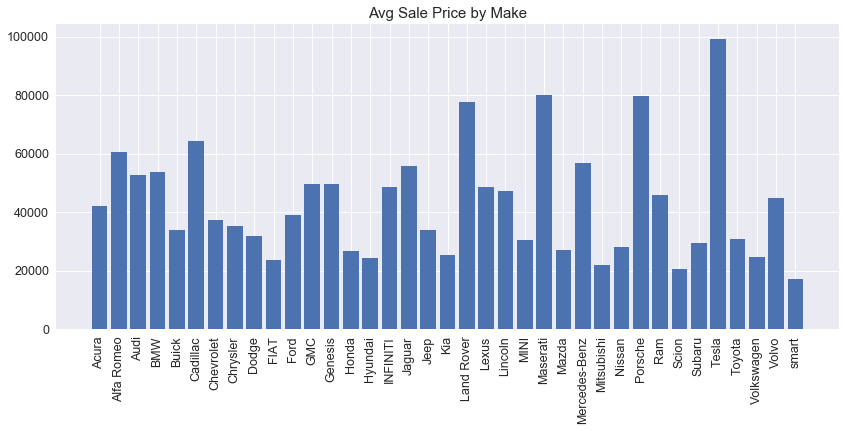

In [53]:
make = df.groupby('make_name')
ind = np.arange(len(make))
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind,make.sale_price_amount.mean())
ax.set_xticks(ind);
ax.set_xticklabels(name,rotation='vertical')
plt.tight_layout()
plt.title('Avg Sale Price by Make');

In [54]:
body_name = df.body_style.unique()
body_name.sort()

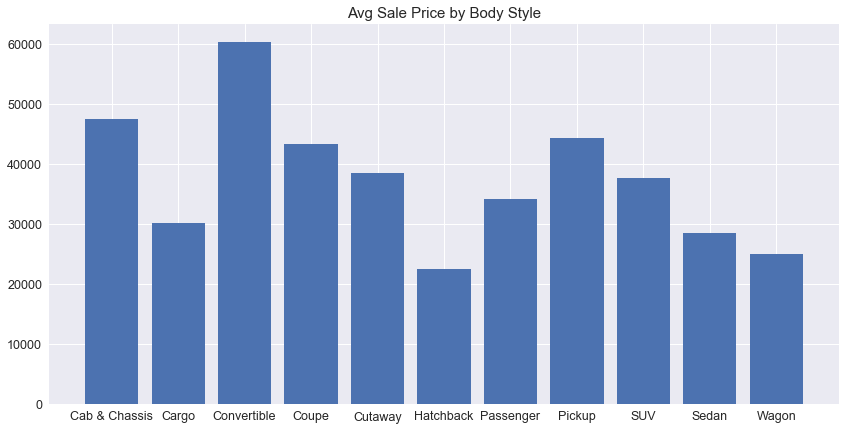

In [55]:
body = df.groupby('body_style')
ind = np.arange(len(body))
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind,body.sale_price_amount.mean())
ax.set_xticks(ind);
ax.set_xticklabels(body_name)
plt.tight_layout()
plt.title('Avg Sale Price by Body Style');

### Feature Selection

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

X = df[cols].iloc[:, :-1].values
y = df['sale_price_amount'].astype(int).values
forest = ExtraTreesClassifier(n_estimators=100,
                             random_state=0)
forest.fit(X,y)
importance = forest.feature_importances_


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [72]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
            axis=0)
indices = np.argsort(importance)[::-1]
feat_cols = df[cols].columns
print('Feature ranking:')
for f in range(X.shape[1]):
    print('%d) %-*s %f' % (f + 1, 30, feat_cols[f], importance[indices[f]]))

Feature ranking:
1) Diesel                         0.288834
2) Electric                       0.281721
3) Flexible Fuel                  0.270893
4) Gas                            0.070129
5) Hybrid                         0.032848
6) transmission_type_le           0.017635
7) transmission_num_of_speeds     0.012044
8) door_count                     0.010139
9) engine_displacement            0.006109
10) engine_cylinders               0.003553
11) days_in_inventory              0.002316
12) mileage                        0.001764
13) msrp_amount                    0.001612
14) model_year                     0.000404


### Training The Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[cols].iloc[:, :-1].values
y = df['sale_price_amount'].values
# y = np.log(df.sale_price_amount.values)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
slr = LinearRegression()
slr.fit(Xtrain, ytrain)
ytrain_pred = slr.predict(Xtrain)
ytest_pred = slr.predict(Xtest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

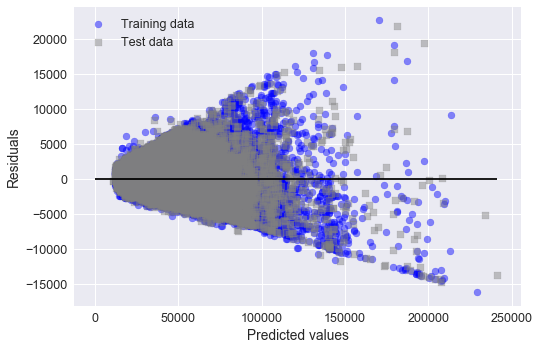

In [57]:
plt.scatter(ytrain_pred, ytrain_pred - ytrain,
           c = 'blue', alpha=0.45, marker='o', label='Training data')
plt.scatter(ytest_pred, ytest_pred - ytest,
           c = 'grey', alpha=0.45, marker='s', label='Test data')
plt.hlines(y = 0, xmin= 0, xmax= ytest_pred.max())
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend();

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_score = slr.score(Xtrain, ytrain)
test_score = slr.score(Xtest, ytest)
print('Training score: {}'.format(train_score))
print('Test score: {}'.format(test_score))
print('MSE Training: {}\nMES Test: {}'.format(mean_squared_error(ytrain, ytrain_pred), mean_squared_error(ytest, ytest_pred)))
print('R2 Score train: {} \nR2 Score test: {}'.format(r2_score(ytrain, ytrain_pred), r2_score(ytest, ytest_pred)))

Training score: 0.987293297752143
Test score: 0.9873294467561154
MSE Training: 2954807.3221779903
MES Test: 2950034.5531897414
R2 Score train: 0.9872932977521431 
R2 Score test: 0.9873294467561153


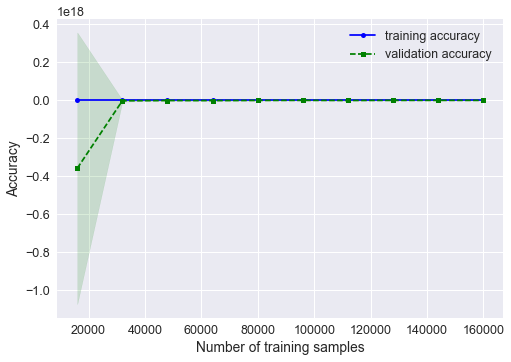

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA()),
                   ('lm', LinearRegression())])

pipe_lr.fit(Xtrain, ytrain)
pipe_lr.score(Xtest, ytest)
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=Xtrain,
                                                       y=ytrain,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=5,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid(b=True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend();

Let's drop MSRP and Engine Displacement or Engine Cylinders

In [77]:
no_msrp_disp = cols[:]
no_msrp_disp.remove('engine_displacement')
no_msrp_disp.remove('msrp_amount')
no_msrp_disp

['Diesel',
 'Electric',
 'Flexible Fuel',
 'Gas',
 'Hybrid',
 'transmission_type_le',
 'transmission_num_of_speeds',
 'door_count',
 'engine_cylinders',
 'days_in_inventory',
 'mileage',
 'model_year',
 'sale_price_amount']

In [78]:
no_msrp_cyl = cols[:]
no_msrp_cyl.remove('engine_cylinders')
no_msrp_cyl.remove('msrp_amount')
no_msrp_cyl

['Diesel',
 'Electric',
 'Flexible Fuel',
 'Gas',
 'Hybrid',
 'transmission_type_le',
 'transmission_num_of_speeds',
 'door_count',
 'engine_displacement',
 'days_in_inventory',
 'mileage',
 'model_year',
 'sale_price_amount']

In [79]:
X = df[no_msrp_disp].iloc[:, :-1].values
y = df.sale_price_amount.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
ytrain_pred = lr.predict(Xtrain)
ytest_pred = lr.predict(Xtest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
train_score = lr.score(Xtrain, ytrain)
test_score = lr.score(Xtest, ytest)

print('Train score: {}'.format(train_score))
print('Test score: {}'.format(test_score))

Train score: 0.533513867851768
Test score: 0.5508587079126598


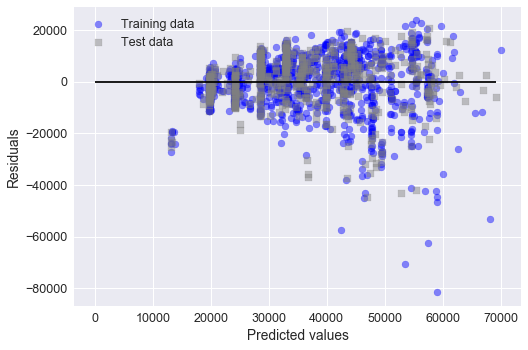

In [81]:
fig, ax = plt.subplots()

ax.scatter(ytrain_pred, ytrain_pred - ytrain,
           c = 'blue', alpha=0.45, marker='o', label='Training data')
ax.scatter(ytest_pred, ytest_pred - ytest,
           c = 'grey', alpha=0.45, marker='s', label='Test data')
ax.hlines(y = 0, xmin= 0, xmax= ytest_pred.max())
ax.set(xlabel='Predicted values', ylabel='Residuals')
plt.legend();

In [82]:
X = df[no_msrp_cyl].iloc[:, :-1]
y = df.sale_price_amount

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

lr2 = LinearRegression()
ytrain_pred = lr2.fit(Xtrain, ytrain).predict(Xtrain)
ytest_pred = lr2.predict(Xtest)
train_score = lr2.score(Xtrain, ytrain)
test_score = lr2.score(Xtest, ytest)

print('Train score: {}'.format(train_score))
print('Test score: {}'.format(test_score))

Train score: 0.5132499544614917
Test score: 0.46795851068858535


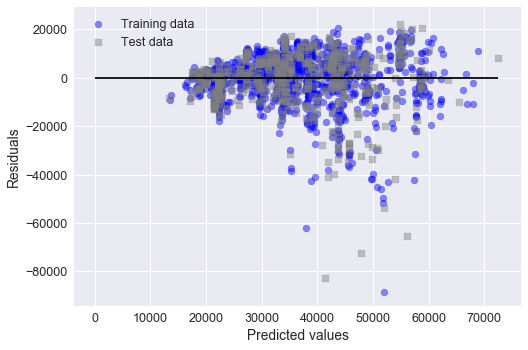

In [83]:
fig, ax = plt.subplots()

ax.scatter(ytrain_pred, ytrain_pred - ytrain,
           c = 'blue', alpha=0.45, marker='o', label='Training data')
ax.scatter(ytest_pred, ytest_pred - ytest,
           c = 'grey', alpha=0.45, marker='s', label='Test data')
ax.hlines(y = 0, xmin= 0, xmax= ytest_pred.max())
ax.set(xlabel='Predicted values', ylabel='Residuals')
plt.legend();

### Using statsmodels to validate

Fitting the model with all features

In [84]:
import statsmodels.api as sm
X = df[cols].iloc[:, :-1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

m = sm.OLS(ytrain, Xtrain)
results = m.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      sale_price_amount   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7795.
Date:                Mon, 24 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:36:08   Log-Likelihood:                -13284.
No. Observations:                1489   AIC:                         2.660e+04
Df Residuals:                    1475   BIC:                         2.667e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Diesel              

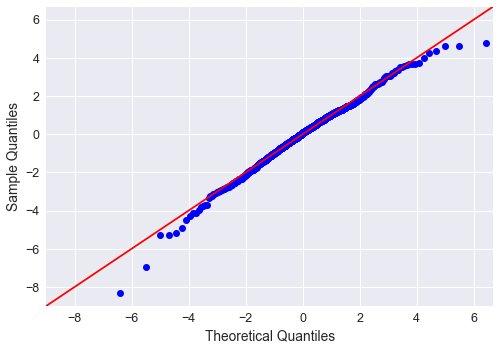

In [86]:
import scipy.stats as stats
res = results.resid
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

Fitting the model dropping MSRP and Engine displacement

In [87]:
X = df[no_msrp_disp].iloc[:, :-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

model = sm.OLS(ytrain, Xtrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      sale_price_amount   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 24 Apr 2017   Prob (F-statistic):          2.08e-250
Time:                        18:39:16   Log-Likelihood:                -15816.
No. Observations:                1489   AIC:                         3.166e+04
Df Residuals:                    1477   BIC:                         3.172e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Diesel              

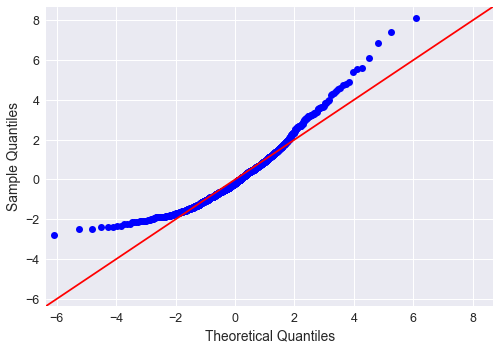

In [88]:
res = results.resid
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

Fitting the model dropping MSRP and engine cylinders

In [89]:
X = df[no_msrp_cyl].iloc[:, :-1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
m = sm.OLS(ytrain, Xtrain)
results = m.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      sale_price_amount   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 24 Apr 2017   Prob (F-statistic):          1.29e-208
Time:                        18:39:50   Log-Likelihood:                -15967.
No. Observations:                1489   AIC:                         3.196e+04
Df Residuals:                    1477   BIC:                         3.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Diesel              

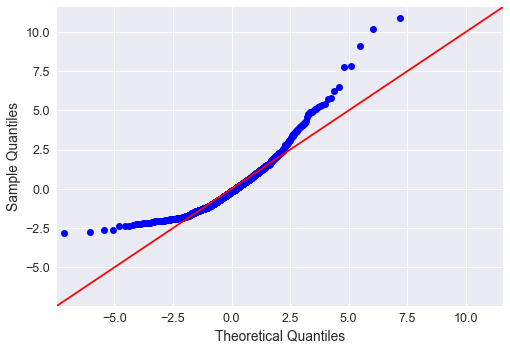

In [90]:
res = results.resid
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

### Training a KNeighborsRegression

In [98]:
from sklearn.neighbors import KNeighborsRegressor

X = df[cols].iloc[:, :-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

kn = KNeighborsRegressor()
kn.fit(Xtrain, ytrain)
ytrain_pred = kn.predict(Xtrain)
ytest_pred = kn.predict(Xtest)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [99]:
print('Training Score: {}'.format(kn.score(Xtrain, ytrain)))
print('Test Score: {}'.format(kn.score(Xtest, ytest)))

Training Score: 0.9883883163066258
Test Score: 0.9784735215643348


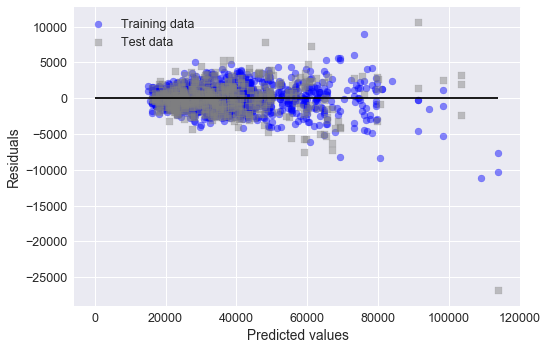

In [100]:
fig, ax = plt.subplots()

ax.scatter(ytrain_pred, ytrain_pred - ytrain,
           c = 'blue', alpha=0.45, marker='o', label='Training data')
ax.scatter(ytest_pred, ytest_pred - ytest,
           c = 'grey', alpha=0.45, marker='s', label='Test data')
ax.hlines(y = 0, xmin= 0, xmax= ytest_pred.max())
ax.set(xlabel='Predicted values', ylabel='Residuals')
plt.legend();

### Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
ytrain_pred = rfr.predict(Xtrain)
ytest_pred = rfr.predict(Xtest)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [103]:
print('Train score: {}'.format(rfr.score(Xtrain, ytrain)))
print('Test score: {}'.format(rfr.score(Xtest, ytest)))

Train score: 0.9975654279226798
Test score: 0.9736301560400412


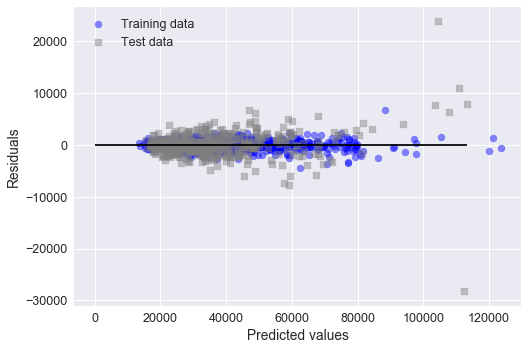

In [104]:
fig, ax = plt.subplots()

ax.scatter(ytrain_pred, ytrain_pred - ytrain,
           c = 'blue', alpha=0.45, marker='o', label='Training data')
ax.scatter(ytest_pred, ytest_pred - ytest,
           c = 'grey', alpha=0.45, marker='s', label='Test data')
ax.hlines(y = 0, xmin= 0, xmax= ytest_pred.max())
ax.set(xlabel='Predicted values', ylabel='Residuals')
plt.legend();